In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

In [4]:
#1-Loading data
boston=load_boston()
boston_data=boston.data
boston_target=boston.target
boston_feature=boston.feature_names

boston_data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
# 2 createing a data frame
dfdata=pd.DataFrame(boston_data,columns=boston_feature)
dfdata["Price"]=boston_target

In [6]:
dfdata.dtypes
dfdata.isnull().sum()
dfdata.describe(percentiles=[0.1,0.3,0.6,0.9])
dfdata.info
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [112]:
#Understanding Data
dfdata["CRIM"].max()
sns.scatterplot(x=dfdata["RM"],y=dfdata["Price"])


In [18]:
#coleartion table
t1=dfdata.corr()["Price"]>0.5
t2=dfdata.corr()["Price"]>-0.5 
t2

CRIM        True
ZN          True
INDUS       True
CHAS        True
NOX         True
RM          True
AGE         True
DIS         True
RAD         True
TAX         True
PTRATIO    False
B           True
LSTAT      False
Price       True
Name: Price, dtype: bool

In [ ]:
dfdata.d

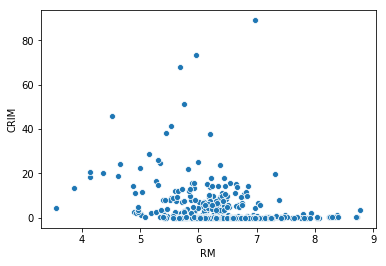

In [110]:
sns.scatterplot(x=dfdata.RM,y=dfdata.CRIM)

In [126]:
#segregation daf in x and y
x=dfdata.drop(columns="Price",axis=1)
y=dfdata["Price"]
x

CRIM    ZN  INDUS  CHAS    NOX  ...   RAD    TAX  PTRATIO       B  LSTAT
0     0.00632  18.0   2.31   0.0  0.538  ...   1.0  296.0     15.3  396.90   4.98
1     0.02731   0.0   7.07   0.0  0.469  ...   2.0  242.0     17.8  396.90   9.14
2     0.02729   0.0   7.07   0.0  0.469  ...   2.0  242.0     17.8  392.83   4.03
3     0.03237   0.0   2.18   0.0  0.458  ...   3.0  222.0     18.7  394.63   2.94
4     0.06905   0.0   2.18   0.0  0.458  ...   3.0  222.0     18.7  396.90   5.33
5     0.02985   0.0   2.18   0.0  0.458  ...   3.0  222.0     18.7  394.12   5.21
6     0.08829  12.5   7.87   0.0  0.524  ...   5.0  311.0     15.2  395.60  12.43
7     0.14455  12.5   7.87   0.0  0.524  ...   5.0  311.0     15.2  396.90  19.15
8     0.21124  12.5   7.87   0.0  0.524  ...   5.0  311.0     15.2  386.63  29.93
9     0.17004  12.5   7.87   0.0  0.524  ...   5.0  311.0     15.2  386.71  17.10
10    0.22489  12.5   7.87   0.0  0.524  ...   5.0  311.0     15.2  392.52  20.45
11    0.11747  12.5   7.87   0.0  0.524  ...   5.0  311.0     15.2  396.90  13.27
12    0.09378  12.5   7.87   0.0  0.524  ...   5.0  311.0     15.2  390.50  15.71
13    0.62976   0.0   8.14   0.0  0.538  ...   4.0  307.0     21.0  396.90   8.26
14    0.63796   0.0   8.14   0.0  0.538  ...   4.0  307.0     21.0  380.02  10.26
15    0.62739   0.0   8.14   0.0  0.538  ...   4.0  307.0     21.0  395.62   8.47
16    1.05393   0.0   8.14   0.0  0.538  ...   4.0  307.0     21.0  386.85   6.58
17    0.78420   0.0   8.14   0.0  0.538  ...   4.0  307.0     21.0  386.75  14.67
18    0.80271   0.0   8.14   0.0  0.538  ...   4.0  307.0     21.0  288.99  11.69
19    0.72580   0.0   8.14   0.0  0.538  ...   4.0  307.0     21.0  390.95  11.28
20    1.25179   0.0   8.14   0.0  0.538  ...   4.0  307.0     21.0  376.57  21.02
21    0.85204   0.0   8.14   0.0  0.538  ...   4.0  307.0     21.0  392.53  13.83
22    1.23247   0.0   8.14   0.0  0.538  ...   4.0  307.0     21.0  396.90  18.72
23    0.98843   0.0   8.14   0.0  0.538  ...   4.0  307.0     21.0  394.54  19.88
24    0.75026   0.0   8.14   0.0  0.538  ...   4.0  307.0     21.0  394.33  16.30
25    0.84054   0.0   8.14   0.0  0.538  ...   4.0  307.0     21.0  303.42  16.51
26    0.67191   0.0   8.14   0.0  0.538  ...   4.0  307.0     21.0  376.88  14.81
27    0.95577   0.0   8.14   0.0  0.538  ...   4.0  307.0     21.0  306.38  17.28
28    0.77299   0.0   8.14   0.0  0.538  ...   4.0  307.0     21.0  387.94  12.80
29    1.00245   0.0   8.14   0.0  0.538  ...   4.0  307.0     21.0  380.23  11.98
..        ...   ...    ...   ...    ...  ...   ...    ...      ...     ...    ...
476   4.87141   0.0  18.10   0.0  0.614  ...  24.0  666.0     20.2  396.21  18.68
477  15.02340   0.0  18.10   0.0  0.614  ...  24.0  666.0     20.2  349.48  24.91
478  10.23300   0.0  18.10   0.0  0.614  ...  24.0  666.0     20.2  379.70  18.03
479  14.33370   0.0  18.10   0.0  0.614  ...  24.0  666.0     20.2  383.32  13.11
480   5.82401   0.0  18.10   0.0  0.532  ...  24.0  666.0     20.2  396.90  10.74
481   5.70818   0.0  18.10   0.0  0.532  ...  24.0  666.0     20.2  393.07   7.74
482   5.73116   0.0  18.10   0.0  0.532  ...  24.0  666.0     20.2  395.28   7.01
483   2.81838   0.0  18.10   0.0  0.532  ...  24.0  666.0     20.2  392.92  10.42
484   2.37857   0.0  18.10   0.0  0.583  ...  24.0  666.0     20.2  370.73  13.34
485   3.67367   0.0  18.10   0.0  0.583  ...  24.0  666.0     20.2  388.62  10.58
486   5.69175   0.0  18.10   0.0  0.583  ...  24.0  666.0     20.2  392.68  14.98
487   4.83567   0.0  18.10   0.0  0.583  ...  24.0  666.0     20.2  388.22  11.45
488   0.15086   0.0  27.74   0.0  0.609  ...   4.0  711.0     20.1  395.09  18.06
489   0.18337   0.0  27.74   0.0  0.609  ...   4.0  711.0     20.1  344.05  23.97
490   0.20746   0.0  27.74   0.0  0.609  ...   4.0  711.0     20.1  318.43  29.68
491   0.10574   0.0  27.74   0.0  0.609  ...   4.0  711.0     20.1  390.11  18.07
492   0.11132   0.0  27.74   0.0  0.609  ...   4.0  711.0     20.1  396.9

In [139]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)

In [147]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(354, 13) (152, 13) (354,) (152,)


In [154]:
lm=LinearRegression()
lm=lm.fit(x_train,y_train)

In [166]:
# r supared values
r2=lm.score(x_train,y_train)
# Prediction on trained model
pred_train=lm.predict(x_train)
pred_train
# mean squared error
print(mean_squared_error(y_train,pred_train))

17.601180259369315


In [174]:
#step 6 predicting on test
pred_test=lm.predict(x_test)
# r2 for test
print("RSquared for test",lm.score(x_test,y_test))
print("Mean squared error",mean_squared_error(y_test,pred_test))

RSquared for test 0.6685538790447987
Mean squared error 33.868033996670015


In [178]:
#  step 7
#Residulas for test
residulas=pred_test-y_test
# Residual graph
ax=sns.residplot(x=pred_test,y=y_test,lowess=True,line_kws={"color":"red","lw":1})
ax.set_title("Residulals vs Fitted")
ax.set_xlabel("PRedictions")
ax.set_ylabel("Residulas")

Text(0, 0.5, 'Residulas')

In [186]:
sm.qqplot(pred_test-y_test,stats.t,distargs=(4,))

In [185]:
stats.shapiro(pred_test-y_test)

(0.8368844985961914, 1.0200406491689407e-11)